# Predict the survival of a horse based on various observed medical conditions.

##  Objective: "Random Forest Classifier" and "Decision Tree" Which algorithm gives us a better model?

In [1]:
# 1. Load the data from "horse.csv"
# 2. check whether it contains any missing values.
# 3. The dataset contains many categorical features; replace them with the label encoding.
# 4. Replace the missing values with the most frequent value in each column.
# 5. Fit a decision tree classifier and random forest classifier and observe the accuracy.
#-------------------------------------------------------------------------------------
#  you are supposed to fit a decision tree and compare its accuracy with random forest classifier.

In [424]:
# import some useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [425]:
# 1. Load the data from "horse.csv".
data = pd.read_csv("horse.csv")

In [426]:
# here we view top 5 rows data.
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [427]:
#    here we getting data columns information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

## check whether it contains any missing values.

In [428]:
# 0   surgery                299 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 1   age                    299 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 2   hospital_number        299 non-null    int64  ==> (Numerical -> Discrete )-> Replace the missing data with the Median
# 3   rectal_temp            239 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 4   pulse                  275 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 5   respiratory_rate       241 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 6   temp_of_extremities    243 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 7   peripheral_pulse       230 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 8   mucous_membrane        252 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 9   capillary_refill_time  267 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 10  pain                   244 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 11  peristalsis            255 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 12  abdominal_distention   243 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 13  nasogastric_tube       195 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 14  nasogastric_reflux     193 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 15  nasogastric_reflux_ph  53 non-null     float64 => (Numerical-> Discrete ) ->Replace the missing data with the Median
# 16  rectal_exam_feces      197 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 17  abdomen                181 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 18  packed_cell_volume     270 non-null    float64 => (Numerical-> Discrete ) ->Replace the missing data with the Median
# 19  total_protein          266 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 20  abdomo_appearance      134 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 21  abdomo_protein         101 non-null    float64 => (Numerical -> Discrete )-> Replace the missing data with the Median
# 22  outcome                299 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 23  surgical_lesion        299 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
# 24  lesion_1               299 non-null    int64 ==> (Numerical-> Discrete ) -> Replace the missing data with the Median
# 25  lesion_2               299 non-null    int64 ==> (Numerical-> Discrete ) -> Replace the missing data with the Median 
# 26  lesion_3               299 non-null    int64 ==> (Numerical-> Discrete ) -> Replace the missing data with the Median 
# 27  cp_data                299 non-null    object => (Numerical-> Discrete ) -> Replace the missing data with the Median 

# Dealing with missing values

In [429]:
# 3 rectal_temp   239 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean 
#----------------------------------------------------------------------------------------------------------------
data.rectal_temp.isnull().sum()
# here we got 60 missing values. 

60

In [430]:
# here we will using fillna() for replace nan value into this column mean value.
data['rectal_temp'].fillna(data['rectal_temp'].mean(), inplace=True)

In [431]:
# here we again check missing values in this columns.
data.rectal_temp.isnull().sum()

0

In [432]:
# 4. pulse 275 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
data.pulse.isnull().sum()

24

In [433]:
# here we will using fillna() for replace nan value into this column mean value.
data['pulse'].fillna(data['pulse'].mean(), inplace=True)

In [434]:
# here we again check missing values in this columns.
data.pulse.isnull().sum()

0

In [435]:
# 5. respiratory_rate 241 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
data.respiratory_rate.isnull().sum()

58

In [436]:
# here we will using fillna() for replace nan value into this column mean value.
data['respiratory_rate'].fillna(data['respiratory_rate'].mean(), inplace=True)

In [437]:
# here we again check missing values in this columns.
data.respiratory_rate.isnull().sum()

0

In [438]:
# 6. temp_of_extremities 243 non-null  object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.temp_of_extremities.isnull().sum()

56

In [439]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['temp_of_extremities'].fillna("cool", inplace=True)

In [440]:
# here we again check missing values in this columns.
data.temp_of_extremities.isnull().sum()

0

In [441]:
# 7. peripheral_pulse 230 non-null  object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.peripheral_pulse.isnull().sum()

69

In [442]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['peripheral_pulse'].fillna("normal", inplace=True)

In [443]:
# here we again check missing values in this columns.
data.peripheral_pulse.isnull().sum()

0

In [444]:
# 8. mucous_membrane 252 non-null  object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.mucous_membrane.isnull().sum()

47

In [445]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['mucous_membrane'].fillna("normal_pink",inplace=True)

In [446]:
# here we again check missing values in this columns.
data.mucous_membrane.isnull().sum()

0

In [447]:
# 9. capillary_refill_time  267 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.capillary_refill_time.isnull().sum()

32

In [448]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['capillary_refill_time'].fillna("less_3_sec",inplace=True)

In [449]:
# here we again check missing values in this columns.
data.capillary_refill_time.isnull().sum()

0

In [450]:
# 10. pain  244 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.pain.isnull().sum()

55

In [451]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['pain'].fillna("mild_pain",inplace=True)

In [452]:
# here we again check missing values in this columns.
data.pain.isnull().sum()

0

In [453]:
# 11. peristalsis 255 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.peristalsis.isnull().sum()

44

In [454]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['peristalsis'].fillna("hypomotile", inplace=True)

In [455]:
# here we again check missing values in this columns.
data.peristalsis.isnull().sum()

0

In [456]:
# 12. abdominal_distention  243 non-null  object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.abdominal_distention.isnull().sum()

56

In [457]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['abdominal_distention'].fillna("none", inplace=True)

In [458]:
# here we again check missing values in this columns.
data.abdominal_distention.isnull().sum()

0

In [459]:
# 13.nasogastric_tube 195 non-null object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.nasogastric_tube.value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

In [460]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['nasogastric_tube'].fillna("slight", inplace = True)

In [461]:
# here we again check missing values in this columns.
data.nasogastric_tube.isnull().sum()

0

In [462]:
# 14.nasogastric_reflux  193 non-null   object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data.nasogastric_reflux.isnull().sum()

106

In [463]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['nasogastric_reflux'].fillna('none',inplace=True)

In [464]:
# here we again check missing values in this columns.
data.nasogastric_reflux.isnull().sum()

0

In [465]:
# 15  nasogastric_reflux_ph  53 non-null     float64 => (Numerical-> Discrete ) ->Replace the missing data with the Median
data.nasogastric_reflux_ph.isnull().sum()

246

In [466]:
# here we will using fillna() for replace nan value into this column median or high uniqe value value.
data['nasogastric_reflux_ph'].fillna(data['nasogastric_reflux_ph'].median(), inplace=True)

In [467]:
# here we again check missing values in this columns.
data.nasogastric_reflux_ph.isnull().sum()

0

In [468]:
# 16. rectal_exam_feces 197 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data['rectal_exam_feces'].isnull().sum()

102

In [469]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['rectal_exam_feces'].fillna("absent", inplace=True)

In [470]:
# here we again check missing values in this columns.
data['rectal_exam_feces'].isnull().sum()

0

In [471]:
# 17. abdomen 181 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data['abdomen'].isnull().sum()

118

In [472]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['abdomen'].fillna("distend_large", inplace=True)

In [473]:
# here we again check missing values in this columns.
data['abdomen'].isnull().sum()

0

In [474]:
# 18. packed_cell_volume 270 non-null  float64 => (Numerical-> Discrete ) ->Replace the missing data with the Median

data['packed_cell_volume'].isnull().sum()

29

In [475]:
# here we will using fillna() for replace nan value into this column median or high uniqe value value.
data['packed_cell_volume'].fillna(data['packed_cell_volume'].median(), inplace=True)

In [476]:
# here we again check missing values in this columns.
data['packed_cell_volume'].isnull().sum()

0

In [477]:
# 19.total_protein 266 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
data.total_protein.isnull().sum()

33

In [478]:
# here we will using fillna() for replace nan value into this column median or high uniqe value value.
data['total_protein'].fillna(data['total_protein'].mean(), inplace=True)

In [479]:
# here we again check missing values in this columns.
data.total_protein.isnull().sum()

0

In [480]:
# 20. abdomo_appearance  134 non-null    object ===> (Non Numerical Columns)--> Replace the missing data with the Mode
data['abdomo_appearance'].isnull().sum()

165

In [481]:
# here we will using fillna() for replace nan value into this column mode or high uniqe value value.
data['abdomo_appearance'].fillna("cloudy",inplace=True)

In [482]:
# here we again check missing values in this columns.
data['abdomo_appearance'].isnull().sum()

0

In [483]:
# 21. abdomo_protein 101 non-null  float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
data['abdomo_protein'].isnull().sum()

198

In [484]:
# here we will using fillna() for replace nan value into this column Median or high uniqe value value.
data['abdomo_protein'].fillna(data["abdomo_protein"].median(), inplace=True)

In [485]:
# here we again check missing values in this columns.
data['abdomo_protein'].isnull().sum()

0

# Deal with outlieres

In [486]:
# 3   rectal_temp            239 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 4   pulse                  275 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 5   respiratory_rate       241 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean
# 19  total_protein          266 non-null    float64 => (Numerical -> Continous )-> Replace the missing data with the Mean


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


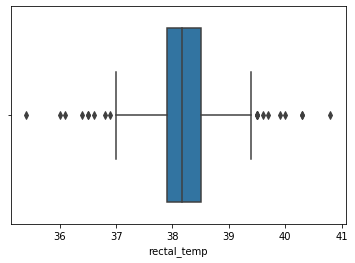

In [487]:
# here we checking outlier visually of 'rectal_temp' column.
sns.boxplot(data.rectal_temp)

In [488]:
# If we got outlire error then we will using customize function that show below.
# The function name is outlinefree.
#-------------------------------------------------------------------------------------------
def outlinefree(dataCol):
    # sorting column
    sorted(dataCol)
    
    # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
    Q1,Q3 = np.percentile(dataCol,[25,75])
    
    # getting IQR (interquartile range)
    IQR = Q3-Q1
    
    # getting Lower range error
    LowerRange = Q1-(1.5 * IQR)
    
    # getting upper range error
    UpperRange = Q3+(1.5 * IQR)
    
    # return Lower range and upper range.
    return LowerRange,UpperRange

In [489]:
# here we getting upper range and lower range  both values
Lowran,Upperran = outlinefree(data.rectal_temp)
print(Lowran,Upperran)

37.0 39.400000000000006


In [490]:
# here we filtering outlieres values
data[(data['rectal_temp'] < Lowran) | (data['rectal_temp'] >Upperran)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
20,yes,adult,530157,39.9,72.0,60.000000,normal,normal,bright_red,more_3_sec,...,46.0,6.100000,cloudy,2.3,lived,yes,2111,0,0,no
44,yes,adult,535407,35.4,140.0,24.000000,cool,reduced,pale_cyanotic,more_3_sec,...,57.0,69.000000,serosanguious,2.0,euthanized,yes,3205,0,0,no
54,no,adult,529461,40.3,114.0,36.000000,cool,reduced,normal_pink,more_3_sec,...,57.0,8.100000,serosanguious,4.5,euthanized,yes,7400,0,0,yes
75,yes,young,534092,39.7,100.0,30.460581,cool,reduced,bright_red,more_3_sec,...,48.0,57.000000,cloudy,2.0,euthanized,yes,1400,0,0,no
80,yes,adult,527518,36.4,98.0,35.000000,cool,reduced,pale_cyanotic,less_3_sec,...,47.0,6.400000,serosanguious,3.6,died,yes,2205,0,0,yes
91,no,adult,529461,40.3,114.0,36.000000,cool,reduced,normal_pink,more_3_sec,...,57.0,8.100000,serosanguious,4.5,died,yes,3205,0,0,yes
99,no,adult,530002,39.6,108.0,51.000000,cool,reduced,dark_cyanotic,more_3_sec,...,59.0,8.000000,cloudy,2.6,lived,no,4300,0,0,yes
113,yes,adult,527933,36.8,60.0,28.000000,cool,normal,normal_pink,less_3_sec,...,45.0,24.274436,cloudy,10.0,died,yes,3205,0,0,yes
117,no,adult,5290482,39.5,72.0,30.460581,cool,reduced,pale_cyanotic,more_3_sec,...,45.0,6.700000,clear,2.3,euthanized,yes,4205,0,0,no
118,yes,adult,533983,36.5,78.0,30.000000,normal,normal,normal_pink,less_3_sec,...,34.0,75.000000,cloudy,1.0,lived,yes,3112,6112,0,no


In [491]:
# here we get mean value of 'rectal_temp' column.
data['rectal_temp'].mean()

38.168619246861994

In [492]:
# here we replace outlieres values into this column mean value.
data.iloc[[20,44,54,75,80,91,99,113,117,118,140,161,230,237,250,258,276,280,286,297],[3]] = 38.1

In [493]:
# again we filtering for double check outlieres
data[(data['rectal_temp'] < Lowran) | (data['rectal_temp'] >Upperran)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


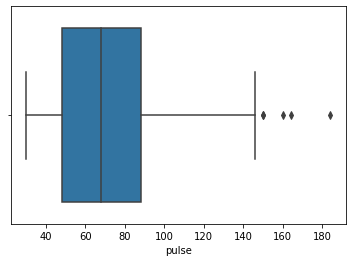

In [494]:
# here we checking outlier visually of 'pulse' column.
sns.boxplot(data.pulse)

In [495]:
# here we getting upper range and lower range  both values
Lowran,Upperran = outlinefree(data.pulse)
print(Lowran,Upperran)

-10.75 147.25


In [496]:
# here we filtering outlieres values
data[(data['pulse'] < Lowran) | (data['pulse'] > Upperran)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.200000,serosanguious,5.3,died,yes,2208,0,0,yes
41,no,young,5288249,39.0,150.0,72.0,cool,normal,normal_pink,less_3_sec,...,47.0,8.500000,cloudy,0.1,lived,yes,9400,0,0,yes
55,yes,young,5282839,38.6,160.0,20.0,cool,normal,bright_red,less_3_sec,...,38.0,24.274436,cloudy,2.3,died,yes,7111,0,0,yes
254,yes,young,5294539,38.8,184.0,84.0,normal,normal,normal_pink,less_3_sec,...,33.0,3.300000,cloudy,2.3,died,yes,7111,0,0,no
274,yes,young,5297159,38.8,150.0,50.0,normal,reduced,dark_cyanotic,more_3_sec,...,50.0,6.200000,cloudy,2.3,died,yes,4207,0,0,no


In [497]:
# here we get mean value of 'pulse' column.
data['pulse'].mean()

72.0

In [498]:
# here we replace outlieres values into this column mean value.
data.iloc[[3,41,55,254,274],[4]] = 72.0

In [499]:
# again we filtering for double check outlieres
data[(data['pulse'] < Lowran) | (data['pulse'] > Upperran)]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


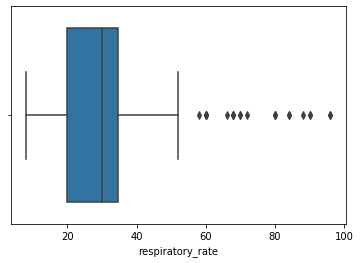

In [500]:
# here we checking outlier visually of 'respiratory_rate' column.
sns.boxplot(data.respiratory_rate)

In [501]:
# here we getting upper range and lower range  both values
Lowran, Upperran = outlinefree(data.respiratory_rate)
print(Lowran,Upperran)

-1.75 56.25


In [502]:
# here we filtering outlieres values
data[(data['respiratory_rate'] < Lowran) | (data['respiratory_rate'] > Upperran )]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
3,yes,young,5290409,39.100000,72.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.200000,serosanguious,5.3,died,yes,2208,0,0,yes
20,yes,adult,530157,38.100000,72.0,60.0,normal,normal,bright_red,more_3_sec,...,46.0,6.100000,cloudy,2.3,lived,yes,2111,0,0,no
23,yes,young,534998,38.300000,130.0,60.0,cool,reduced,normal_pink,less_3_sec,...,50.0,70.000000,cloudy,2.3,lived,yes,3111,0,0,no
39,yes,young,5277409,39.200000,146.0,96.0,cool,normal,normal_pink,less_3_sec,...,45.0,24.274436,cloudy,2.3,died,yes,2113,0,0,no
41,no,young,5288249,39.000000,72.0,72.0,cool,normal,normal_pink,less_3_sec,...,47.0,8.500000,cloudy,0.1,lived,yes,9400,0,0,yes
82,yes,young,5290759,38.100000,100.0,80.0,cool,normal,bright_pink,less_3_sec,...,36.0,5.700000,cloudy,2.3,lived,yes,3111,0,0,no
84,yes,adult,529849,37.800000,60.0,80.0,normal,reduced,bright_pink,more_3_sec,...,40.0,4.500000,cloudy,2.3,lived,yes,5206,0,0,yes
103,yes,young,5292489,38.000000,140.0,68.0,normal,normal,normal_pink,less_3_sec,...,39.0,5.300000,cloudy,2.3,lived,yes,7111,0,0,no
106,yes,adult,528668,38.300000,52.0,96.0,cool,reduced,pale_pink,less_3_sec,...,43.0,6.100000,cloudy,2.3,lived,yes,3209,0,0,yes
120,yes,adult,528682,39.400000,54.0,66.0,normal,normal,bright_pink,less_3_sec,...,39.0,6.000000,cloudy,2.3,lived,yes,2206,0,0,yes


In [503]:
# here we get mean value of 'respiratory_rate' column.
data['respiratory_rate'].mean()

30.460580912863087

In [504]:
# here we replace outlieres values into this column mean value.
data.iloc[[3,20,23,39,41,82,84,103,106,120,125,184,185,207,219,228,243,247,254,264,268,294],[5]] = 30.4

In [505]:
# again we filtering for double check outlieres
data[(data['respiratory_rate'] < Lowran) | (data['respiratory_rate'] > Upperran )]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


C:\Users\ANOOP\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


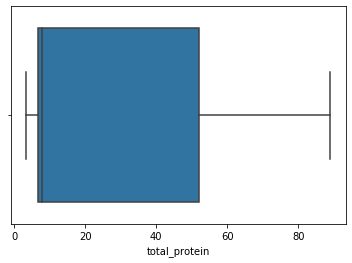

In [506]:
# here we checking outlier visually of 'total_protein' column.
sns.boxplot(data.total_protein)

In [507]:
# here we getting upper range and lower range  both values
Lowran, Upperran = outlinefree(data.total_protein)
print(Lowran,Upperran)

-61.49999999999999 120.1


In [508]:
# here we filtering outlieres values
data[(data['total_protein'] < Lowran) | (data['total_protein'] > Upperran )]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


# Feature engineering

In [509]:
# here we will convert all text  or categorical columns into numberic with the help of "label encoding".

In [510]:
data.shape

(299, 28)

In [511]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [512]:
# here we are using "get_dummies ()" function for convert category or text or string into numeric values.

In [513]:
data.surgery.value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [514]:
data.surgery.replace(['no','yes'],[0,1], inplace=True)

In [515]:
data.surgery.value_counts()

1    180
0    119
Name: surgery, dtype: int64

In [516]:
data.age.value_counts()

adult    275
young     24
Name: age, dtype: int64

In [566]:
data.cp_data.replace(["no","yes"],[0,1], inplace=True)
data.surgical_lesion.replace(["no","yes"],[0,1], inplace=True)

In [517]:
# here we replace adult and young into 0 and 1 
data.age.replace(['adult','young'],[0,1], inplace=True)

In [518]:
data.age.value_counts()

0    275
1     24
Name: age, dtype: int64

In [519]:
temp_of_extremities =  pd.get_dummies(data.temp_of_extremities)

In [520]:
peripheral_pulse = pd.get_dummies(data.peripheral_pulse)

In [521]:
mucous_membrane = pd.get_dummies(data.mucous_membrane)

In [522]:
capillary_refill_time = pd.get_dummies(data.capillary_refill_time)

In [523]:
pain = pd.get_dummies(data.pain)

In [524]:
peristalsis = pd.get_dummies(data.peristalsis)

In [525]:
abdominal_distention = pd.get_dummies(data.abdominal_distention)

In [526]:
nasogastric_tube = pd.get_dummies(data.nasogastric_tube)

In [527]:
nasogastric_reflux = pd.get_dummies(data.nasogastric_reflux)

In [528]:
rectal_exam_feces =  pd.get_dummies(data.rectal_exam_feces)

In [529]:
abdomen = pd.get_dummies(data.abdomen)

In [530]:
abdomo_appearance =  pd.get_dummies(data.abdomo_appearance)

In [531]:
newdata = pd.concat([temp_of_extremities, peripheral_pulse, mucous_membrane, capillary_refill_time,pain,
                     peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,
                    abdomo_appearance], axis=1)
newdata.head(2)

,cold,cool,normal,warm,absent,increased,normal,reduced,bright_pink,bright_red,...,increased,normal,distend_large,distend_small,firm,normal,other,clear,cloudy,serosanguious
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [567]:
new2data = pd.concat([data.surgery, data.age,data.hospital_number, data.rectal_temp, data.pulse, data.respiratory_rate, data.nasogastric_reflux_ph,
                     data.packed_cell_volume,data.total_protein,data.abdomo_protein,data.surgical_lesion,data.lesion_1,
                      data.lesion_2,data.lesion_3,data.cp_data,data.outcome], axis=1)
new2data.head(2)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,0,530101,38.5,66.0,28.0,5.0,45.0,8.4,2.3,0,11300,0,0,0,died
1,1,0,534817,39.2,88.0,20.0,5.0,50.0,85.0,2.0,0,2208,0,0,0,euthanized


In [533]:
new2data.shape

(299, 16)

In [568]:
final_data = pd.concat([newdata,new2data], axis=1)
final_data.head(2)

,cold,cool,normal,warm,absent,increased,normal,reduced,bright_pink,bright_red,...,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,1,0,0,0,0,0,1,0,0,...,5.0,45.0,8.4,2.3,0,11300,0,0,0,died
1,0,1,0,0,0,0,1,0,0,0,...,5.0,50.0,85.0,2.0,0,2208,0,0,0,euthanized


In [569]:
final_data.shape

(299, 64)

In [575]:
features = final_data.iloc[:,:-1].values
features.ndim

2

In [577]:
label = final_data.iloc[:,63].values
label.ndim

1

In [ ]:
# here we have a numeric dataset that is a very good thing for model prediction.

In [589]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

for i in range(1,400):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    
    modelDtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
    modelDtree.fit(X_train,y_train)
    
    training = modelDtree.score(X_train,y_train)
    testing = modelDtree.score(X_test,y_test)
    
    if testing > training and testing > 0.7:
        print("testing score: {} , train score: {} and seed {} ".format(testing,training,i))

testing score: 0.7166666666666667 , train score: 0.694560669456067 and seed 1 
testing score: 0.8 , train score: 0.6861924686192469 and seed 6 
testing score: 0.7333333333333333 , train score: 0.7154811715481172 and seed 7 
testing score: 0.7333333333333333 , train score: 0.7154811715481172 and seed 12 
testing score: 0.75 , train score: 0.7071129707112971 and seed 17 
testing score: 0.7333333333333333 , train score: 0.7154811715481172 and seed 18 
testing score: 0.7333333333333333 , train score: 0.7154811715481172 and seed 28 
testing score: 0.7666666666666667 , train score: 0.702928870292887 and seed 30 
testing score: 0.7333333333333333 , train score: 0.7071129707112971 and seed 34 
testing score: 0.7666666666666667 , train score: 0.6820083682008368 and seed 40 
testing score: 0.75 , train score: 0.7071129707112971 and seed 45 
testing score: 0.7166666666666667 , train score: 0.7154811715481172 and seed 56 
testing score: 0.7333333333333333 , train score: 0.702928870292887 and seed 

In [ ]:
# Decision Tree:       
#---------------
#                                    "Balanced model"
#                                   ------------------
# criterion='entropy',max_depth=2
# testing score: 0.75 , train score: 0.6610878661087866 and seed 327
# criterion='gini',max_depth=2
# testing score: 0.75 , train score: 0.6778242677824268 and seed 162
#-----------------------------------------------------------------------------------------------------------

#                                    "underfitting model"
#                                   ------------------------
# criterion='entropy',max_depth=3
# testing score: 0.75 , train score: 0.6610878661087866 and seed 327
# criterion='gini',max_depth=3
# testing score: 0.85 , train score: 0.6861924686192469 and seed 355 

In [591]:
from sklearn.ensemble import RandomForestClassifier
modelRFC = RandomForestClassifier()

In [592]:
modelRFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# here we are using the "Random Forest Classifier" algorithm for a better model.

In [602]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

for i in range(1,300):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    
    modelRFC = RandomForestClassifier(criterion='gini',max_depth=4)
    modelRFC.fit(X_train,y_train)
    
    training = modelRFC.score(X_train,y_train)
    testing = modelRFC.score(X_test,y_test)
    
    if testing > training and testing > 0.8:
        print("testing score: {} , train score: {} and seed {} ".format(testing,training,i))

testing score: 0.8333333333333334 , train score: 0.8200836820083682 and seed 6 
testing score: 0.8166666666666667 , train score: 0.799163179916318 and seed 10 
testing score: 0.8166666666666667 , train score: 0.803347280334728 and seed 127 
testing score: 0.8333333333333334 , train score: 0.7866108786610879 and seed 297 


In [ ]:
# random forest classifier:      
#--------------------------
#                                   "Underfiting model"
#                                  ----------------------
# criterion='gini' and max_depth=3
# testing score: 0.8333333333333334 , train score: 0.7405857740585774 and seed 26
# testing score: 0.8666666666666667 , train score: 0.7112970711297071 and seed 388
# criterion='entropy' and max_depth=3
# testing score: 0.8166666666666667 , train score: 0.7112970711297071 and seed 388
#testing score: 0.8166666666666667 , train score: 0.7280334728033473 and seed 289
#-----------------------------------------------------------------------------------------------------
#                                  " Balanced model"
#                                ------------------------
# criterion='gini' and max_depth=4
# testing score: 0.8333333333333334 , train score: 0.8200836820083682 and seed 6
# criterion='entropy' and max_depth=4
# testing score: 0.8333333333333334 , train score: 0.8158995815899581 and seed 289


#---------------------------------------------------------------------------------------------------------
#                                   "Overfitting model"
#                                   --------------------
# criterion='gini' and max_depth=5
# none
# criterion='entropy' and max_depth=5
# none

In [604]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=6)
    
modelRFC = RandomForestClassifier(criterion='gini',max_depth=4)
modelRFC.fit(X_train,y_train)
    
training = modelRFC.score(X_train,y_train)
testing = modelRFC.score(X_test,y_test)   
   
print("testing score: {} , train score: {} and seed {} ".format(testing,training,i))

testing score: 0.8166666666666667 , train score: 0.799163179916318 and seed 299 


In [605]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=289)
    
modelRFC = RandomForestClassifier(criterion='entropy',max_depth=4)
modelRFC.fit(X_train,y_train)
    
training = modelRFC.score(X_train,y_train)
testing = modelRFC.score(X_test,y_test)   
   
print("testing score: {} , train score: {} and seed {} ".format(testing,training,i))

testing score: 0.8 , train score: 0.7824267782426778 and seed 299 


# Conclusion: "Random Forest Classification" algorithm gives us a better result comparison of "Decision Tree" algorithms.